I. Introduction

Social media is becoming a trends nowadays. Understanding the engagement in short-form media is crucial to have a good roadmap in increasing the popularity in social media. In this notebook, the aiming is finding the current trends, to interprete the most effective engagement metrics and to provide a good map to improve the efficiency and accurate in near future media plan.

II. Objectives

1. EDA the dataset (shorts_vs_tiktok)
2. Top 10 most engagemen profiles?
3. Top 10 hastags with most views?
4. Top 10 hastags with most likes?
5. Trend Identification & Analysis
    Objective: To identify the key trends in short-form video consumption across different countries and platforms.
    Expected outcome: A clear understanding of the most active and fastest-growing markets for short-form video.

6. Engagement Metrics Interpretation
    Objective: To determine which engagement metrics are most predictive of video popularity and virality.
    Expected outcome: An interpretation of which metrics (e.g., shares vs. likes) are the strongest indicators of a video's success, providing actionable insights for content creators.

7. Creator and Content Strategy
    Objective: To provide a data-driven roadmap for improving media efficiency and accuracy.
    Expected outcome: A set of actionable recommendations for a media plan, such as "Focus on content in [Category X] and collaborate with creators in the [Y Tier] to maximize engagement."

III. Preparation


In [100]:
## Import library
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

# Import my utils
from utils import *

# Set working directory
for pathname, dirname, filenames in os.walk('Dataset'):
    for filename in filenames:
        if filename.endswith('.csv'):
            print("Found csv file:", os.path.join(pathname, filename))

#Link dataset :https://www.kaggle.com/datasets/tarekmasryo/youtube-shorts-and-tiktok-trends-2025?select=DATA_DICTIONARY.csv


Found csv file: Dataset/monthly_trends_2025.csv
Found csv file: Dataset/youtube_shorts_tiktok_trends_2025.csv
Found csv file: Dataset/top_creators_impact_2025.csv
Found csv file: Dataset/country_platform_summary_2025.csv
Found csv file: Dataset/top_hashtags_2025.csv
Found csv file: Dataset/DATA_DICTIONARY.csv


In [101]:
# Load dataset
monthly_trends = pl.read_csv('Dataset/monthly_trends_2025.csv')
top_creators = pl.read_csv('Dataset/top_creators_impact_2025.csv')
top_hashtags = pl.read_csv('Dataset/top_hashtags_2025.csv')
shorts_vs_tiktok = pl.read_csv('Dataset/youtube_shorts_tiktok_trends_2025.csv')
platform_summary = pl.read_csv('Dataset/country_platform_summary_2025.csv')
Data_dictionary = pl.read_csv('Dataset/DATA_DICTIONARY.csv')


In [102]:
# Check null values
print("Null values in each dataset:")
display(monthly_trends.null_count().pipe(sum).item())
display(top_creators.null_count().pipe(sum).item())
display(top_hashtags.null_count().pipe(sum).item())
display(shorts_vs_tiktok.null_count().pipe(sum).item())
display(platform_summary.null_count().pipe(sum).item())
display(Data_dictionary.null_count().pipe(sum).item())
print("--- End of null value check ---\n")


Null values in each dataset:


0

0

0

0

0

0

--- End of null value check ---



The "DATA_DICTIONARY" includes various column names with their descriptions as follow:

In [103]:

# Display Dictionary
print("Data Dictionary:")
i = 1
Data_dictionary = Data_dictionary.sort('column')
for row in Data_dictionary.to_dicts():
    if i % 10 == 0:
        print('\n')
    print(f'{i}. Column "{row["column"]}" is "{row["description"]}"')
    i += 1
print("--- End of Data Dictionary ---")

Data Dictionary:
1. Column "author_handle" is "Creator handle/channel (brand-like, synthetic)"
2. Column "avg_watch_time_sec" is "Estimated average watch time (seconds)"
3. Column "category" is "Video category (if available)"
4. Column "comment_ratio" is "comments / views"
5. Column "comments" is "Comments count"
6. Column "completion_rate" is "avg_watch_time_sec / duration_sec"
7. Column "country" is "Country ISO-2 code"
8. Column "creator_avg_views" is "Avg views per video for the creator (across dataset rows)"
9. Column "creator_tier" is "Creator tier based on avg views: Micro / Mid / Macro / Star"


10. Column "device_brand" is "If mobile: device brand (iPhone, Samsung, Huawei, Xiaomi, Oppo, Vivo, Pixel, Other); Web → Desktop"
11. Column "device_type" is "Android/iOS/Web"
12. Column "dislike_rate" is "dislikes / views"
13. Column "dislikes" is "Dislikes (synthetic, platform-aware)"
14. Column "duration_sec" is "Shorts-style duration in seconds (TikTok ~5–75, YouTube ~5–90)"
15. Col

In [104]:
# Display schema of each dataset
print("Schema of each dataset:")
print("Monthly Trends Schema:")
display(monthly_trends.schema)
print('Shape size: ', monthly_trends.shape)
print("------------------------------\n")
print("Top Creators Schema:")
display(top_creators.schema)
print('Shape size: ', top_creators.shape)
print("------------------------------\n")
print("Top Hashtags Schema:")
display(top_hashtags.schema)
print('Shape size: ', top_hashtags.shape)
print("------------------------------\n")
print("Shorts vs TikTok Schema:")
display(shorts_vs_tiktok.schema)
print('Shape size: ', shorts_vs_tiktok.shape)
print("------------------------------\n")
print("Platform Summary Schema:")
display(platform_summary.schema)
print('Shape size: ', platform_summary.shape)
print("--- End of schema display ---\n")


Schema of each dataset:
Monthly Trends Schema:


Schema([('country', String),
        ('platform', String),
        ('year_month', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('avg_er', Float64),
        ('avg_velocity', Float64),
        ('trend_label', String)])

Shape size:  (480, 8)
------------------------------

Top Creators Schema:


Schema([('author_handle', String),
        ('platform', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('avg_er', Float64),
        ('likes_sum', Int64),
        ('dislikes_sum', Int64),
        ('comments_sum', Int64),
        ('shares_sum', Int64),
        ('saves_sum', Int64),
        ('total_engagements', Int64),
        ('avg_engagement_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_like_dislike_ratio', Float64),
        ('avg_engagement_per_1k', Float64),
        ('avg_like_rate', Float64),
        ('avg_dislike_rate', Float64),
        ('creator_avg_views', Float64)])

Shape size:  (1000, 20)
------------------------------

Top Hashtags Schema:


Schema([('platform', String),
        ('hashtag', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('avg_er', Float64),
        ('avg_engagement_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_like_dislike_ratio', Float64),
        ('avg_engagement_per_1k', Float64),
        ('avg_like_rate', Float64),
        ('avg_dislike_rate', Float64),
        ('total_engagements', Int64)])

Shape size:  (82, 18)
------------------------------

Shorts vs TikTok Schema:


Schema([('platform', String),
        ('country', String),
        ('region', String),
        ('language', String),
        ('category', String),
        ('hashtag', String),
        ('title_keywords', String),
        ('author_handle', String),
        ('sound_type', String),
        ('music_track', String),
        ('week_of_year', Int64),
        ('duration_sec', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('engagement_rate', Float64),
        ('trend_label', String),
        ('source_hint', String),
        ('notes', String),
        ('device_type', String),
        ('upload_hour', Int64),
        ('genre', String),
        ('trend_duration_days', Int64),
        ('trend_type', String),
        ('engagement_velocity', Float64),
        ('dislikes', Int64),
        ('comment_ratio', Float64),
        ('share_rate', Float64),
        ('save_rate', Float64),
        ('like_dislik

Shape size:  (48079, 58)
------------------------------

Platform Summary Schema:


Schema([('country', String),
        ('platform', String),
        ('total_videos', Int64),
        ('total_views', Int64),
        ('median_er', Float64),
        ('p95_views', Float64),
        ('avg_duration', Float64),
        ('avg_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_engagement_per_1k', Float64),
        ('top_hashtag', String),
        ('top_hashtag_views', Int64)])

Shape size:  (60, 14)
--- End of schema display ---



In [105]:
# Display first few rows of each dataset
print("First few rows of each dataset:")
display(monthly_trends.head(3))
display(top_creators.head(3))
display(top_hashtags.head(3))
display(shorts_vs_tiktok.head(3))
display(platform_summary.head(3))
print("--- End of dataset preview ---\n")


First few rows of each dataset:


country,platform,year_month,n_videos,views,avg_er,avg_velocity,trend_label
str,str,str,i64,i64,f64,f64,str
"""AE""","""TikTok""","""2025-01""",130,14474636,0.093197,18357.548923,"""steady"""
"""AE""","""TikTok""","""2025-02""",112,11873208,0.092006,14471.823839,"""declining"""
"""AE""","""TikTok""","""2025-03""",129,15551725,0.088624,15883.138605,"""rising"""


author_handle,platform,n_videos,views,avg_er,likes_sum,dislikes_sum,comments_sum,shares_sum,saves_sum,total_engagements,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,creator_avg_views
str,str,i64,i64,f64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""UrbanVision""","""TikTok""",136,17938952,0.091914,1267238,36094,142403,125916,124572,1660129,17957.9025,0.007648,0.006849,0.007302,49.73521,91.913699,0.070115,0.001887,120866.4
"""BeyondStudio""","""TikTok""",135,17085072,0.087916,1121223,31594,123017,114620,130934,1489794,17890.303481,0.007439,0.006496,0.006724,49.875449,87.915533,0.067256,0.001922,116192.9
"""StreetVision""","""TikTok""",133,16843324,0.093018,1228515,28953,129169,114222,138762,1610668,18574.954962,0.007454,0.006886,0.007555,54.076138,93.018098,0.071123,0.00187,116083.5


platform,hashtag,n_videos,views,likes,comments,shares,saves,avg_er,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,total_engagements
str,str,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
"""TikTok""","""#FYP""",7379,734064265,51402240,5651829,4998382,5348188,0.091838,13954.979633,0.007692,0.006783,0.007221,51.436016,91.837843,0.070141,0.001892,67400639
"""TikTok""","""#GRWM""",1013,111331419,7726251,843072,753230,777258,0.09132,15906.769319,0.007638,0.006746,0.007104,49.449781,91.319729,0.069833,0.001921,10099811
"""TikTok""","""#Comedy""",762,79538424,5748752,620867,551845,606968,0.092762,14930.337533,0.007677,0.006833,0.007625,49.351872,92.76152,0.070627,0.001941,7528432


platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,week_of_year,duration_sec,views,likes,comments,shares,saves,engagement_rate,trend_label,source_hint,notes,device_type,upload_hour,genre,trend_duration_days,trend_type,engagement_velocity,dislikes,comment_ratio,share_rate,save_rate,like_dislike_ratio,publish_dayofweek,publish_period,event_season,tags,sample_comments,creator_avg_views,creator_tier,season,publish_date_approx,year_month,title,title_length,has_emoji,avg_watch_time_sec,completion_rate,device_brand,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,f64,str,str,str,str,i64,str,i64,str,f64,i64,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,i64,i64,f64,f64,str,str,i64,str,i64,f64,f64,f64,f64,f64,f64
"""TikTok""","""Jp""","""Asia""","""ja""","""Gaming""","""#Lifestyle""","""Night Routine — College""","""NextVision""","""trending""","""8bit loop""",1,40,252497,21755,3170,1977,3415,0.120069,"""rising""","""TikTok Creative Center""","""split-screen""","""Android""",15,"""Lifestyle""",4,"""Short""",63124.25,1011,0.012555,0.00783,0.013525,21.497036,"""Saturday""","""Afternoon""","""Regular""","""daily, lifestyle, motivation""","""ずっと見ちゃう😂""",96474.3,"""Mid""","""Spring""","""2025-01-04""","""2025-01""","""Night Routine — Productivity 🏖…",31,1,25.8,0.645,"""iPhone""","""External""",1,"""2e681528d17a1fe1986857942536ec…",30317,0.086159,0.004004,120.069,0.086159,0.012555,0.00783
"""TikTok""","""Se""","""Europe""","""sv""","""Food""","""#Sports""","""Morning Routine — College""","""DailyVlogsDiego""","""trending""","""Street vibe""",1,18,270580,23080,2124,2108,3265,0.113005,"""declining""","""TikTok Creative Center""","""greenscreen""","""Android""",3,"""Sports""",56,"""Evergreen""",4831.79,655,0.00785,0.007791,0.012067,35.182927,"""Wednesday""","""Night""","""Regular""","""gym, football, workout""","""This is fire 🔥""",104638.4,"""Mid""","""Fall""","""2025-01-01""","""2025-01""","""Football skills in 60s 📱""",24,1,10.4,0.578,"""iPhone""","""Search""",0,"""2e35fa0b2978b9cae635839c1d4e9e…",30577,0.085298,0.002421,113.005,0.085298,0.00785,0.007791
"""TikTok""","""Za""","""Africa""","""en""","""Art""","""#Workout""","""Night Routine — College""","""BeyondHub""","""licensed""","""Gallery pad""",1,22,7385,363,33,38,69,0.068111,"""seasonal""","""TikTok Creative Center""","""subtitles""","""Android""",15,"""Sports""",11,"""Medium""",671.36,12,0.004469,0.005146,0.009343,27.923077,"""Sunday""","""Afternoon""","""Regular""","""football, gym, workout""","""Instant like!""",108139.9,"""Mid""","""Fall""","""2025-01-05""","""2025-01""","""Football skills in 60s""",22,0,11.7,0.532,"""Huawei""","""External""",1,"""0d88a011235a82244995ef52961f95…",503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146


country,platform,total_videos,total_views,median_er,p95_views,avg_duration,avg_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_engagement_per_1k,top_hashtag,top_hashtag_views
str,str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64
"""Ae""","""TikTok""",1017,102064271,0.09,325484.4,29.7335,13785.7142,0.0077,0.0068,0.0072,92.4015,"""#FYP""",26292844
"""Ae""","""YouTube""",641,67638733,0.0492,332142.0,41.8721,14381.0054,0.0043,0.0038,0.004,51.2265,"""#FYP""",18272805
"""Ar""","""TikTok""",1032,103715112,0.0877,311367.55,29.7025,13126.5611,0.0076,0.0067,0.0071,90.0953,"""#FYP""",27220930


--- End of dataset preview ---



In [106]:
# Display summary statistics of each dataset
print("Summary statistics of each dataset:")
display(monthly_trends.describe())
display(top_creators.describe())
display(top_hashtags.describe())
display(shorts_vs_tiktok.describe())
display(platform_summary.describe())
print("--- End of summary statistics ---\n")


Summary statistics of each dataset:


statistic,country,platform,year_month,n_videos,views,avg_er,avg_velocity,trend_label
str,str,str,str,f64,f64,f64,f64,str
"""count""","""480""","""480""","""480""",480.0,480.0,480.0,480.0,"""480"""
"""null_count""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0"""
"""mean""",null,null,null,100.164583,9.9456e6,0.071325,13827.294022,null
"""std""",null,null,null,23.055982,2.7228e6,0.020566,2576.210652,null
"""min""","""AE""","""TikTok""","""2025-01""",52.0,4.402922e6,0.046267,8127.423516,"""declining"""
"""25%""",null,null,null,80.0,7.746645e6,0.050687,11922.079773,null
"""50%""",null,null,null,98.0,9.758886e6,0.085923,13520.303509,null
"""75%""",null,null,null,120.0,1.1892837e7,0.091783,15502.540476,null
"""max""","""ZA""","""YouTube""","""2025-08""",161.0,1.8611773e7,0.096982,23553.853889,"""steady"""


statistic,author_handle,platform,n_videos,views,avg_er,likes_sum,dislikes_sum,comments_sum,shares_sum,saves_sum,total_engagements,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,creator_avg_views
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""1000""","""1000""",1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,42.465,4.3552e6,0.075879,257384.776,10513.751,28183.865,24834.915,26489.573,336893.129,14845.889342,0.006342,0.005595,0.005982,36.766501,75.878799,0.05796,0.002449,102532.157
"""std""",null,null,26.342869,2.6664e6,0.020263,190031.795555,6659.211004,20914.041471,18323.531516,19561.921253,248457.038829,4637.210089,0.001744,0.001509,0.00166,17.753203,20.263305,0.015464,0.000713,17963.350671
"""min""","""Ahmed""","""TikTok""",9.0,1.854548e6,0.042553,54460.0,2319.0,5757.0,4645.0,5021.0,71114.0,5242.903158,0.003355,0.00286,0.002909,11.702222,42.553286,0.032481,0.001307,62987.8
"""25%""",null,null,24.0,2.476217e6,0.051744,140342.0,5514.0,15134.0,13440.0,14099.0,185161.0,11839.983636,0.004317,0.003823,0.004123,15.913681,51.74429,0.03962,0.001878,90488.4
"""50%""",null,null,32.0,3.402797e6,0.088199,191561.0,8750.0,20900.0,18411.0,19841.0,250287.0,13936.596667,0.007254,0.006455,0.006659,45.12299,88.199115,0.067235,0.002076,99969.1
"""75%""",null,null,56.0,5.517457e6,0.0925193,324122.0,12914.0,35756.0,31532.0,33304.0,426885.0,16947.840784,0.007773,0.0068325,0.007311,51.237983,92.5193,0.0708,0.003185,111410.3
"""max""","""YukiYT""","""YouTube""",148.0,1.7938952e7,0.108453,1.267238e6,44175.0,142403.0,125916.0,138762.0,1.660129e6,38952.964583,0.009708,0.008219,0.010096,86.744616,108.453476,0.08284,0.004324,222935.4


statistic,platform,hashtag,n_videos,views,likes,comments,shares,saves,avg_er,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,total_engagements
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""82""","""82""",82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,606.146341,6.0185e7,3.4783e6,380984.54878,335587.329268,358013.439024,0.071252,13828.640505,0.005949,0.005241,0.005616,32.488263,71.252388,0.054446,0.002607,4.5529e6
"""std""",null,null,923.117773,9.1899e7,5.8787e6,647084.420888,571559.709322,611476.905006,0.02054,1333.255227,0.001745,0.001515,0.001609,17.228664,20.539576,0.015679,0.000688,7.7087e6
"""min""","""TikTok""","""#AI""",26.0,2.435911e6,96785.0,10526.0,9340.0,10167.0,0.048971,10526.083602,0.00367,0.003526,0.003738,13.785287,48.970571,0.037644,0.001806,126896.0
"""25%""",null,null,370.0,3.720152e7,1.435941e6,158224.0,137780.0,148225.0,0.050902,13024.526164,0.00422,0.003741,0.004015,15.498121,50.901968,0.038811,0.001932,1.887284e6
"""50%""",null,null,494.0,4.8606684e7,2.320738e6,242219.0,220205.0,230235.0,0.083718,13954.979633,0.007241,0.006038,0.006509,42.067435,83.717531,0.063903,0.003102,3.013397e6
"""75%""",null,null,583.0,5.8864171e7,4.062383e6,445614.0,388586.0,404648.0,0.091699,14735.557953,0.007691,0.00678,0.007223,49.697196,91.699072,0.070086,0.003268,5.303778e6
"""max""","""YouTube""","""#Workout""",7379.0,7.34064265e8,5.140224e7,5.651829e6,4.998382e6,5.348188e6,0.095668,16869.724872,0.008029,0.006919,0.007625,55.193864,95.668146,0.073752,0.003712,6.7400639e7


statistic,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,week_of_year,duration_sec,views,likes,comments,shares,saves,engagement_rate,trend_label,source_hint,notes,device_type,upload_hour,genre,trend_duration_days,trend_type,engagement_velocity,dislikes,comment_ratio,share_rate,save_rate,like_dislike_ratio,publish_dayofweek,publish_period,event_season,tags,sample_comments,creator_avg_views,creator_tier,season,publish_date_approx,year_month,title,title_length,has_emoji,avg_watch_time_sec,completion_rate,device_brand,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,str,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64
"""count""","""48079""","""48079""","""48079""","""48079""","""48079""","""48079""","""48079""","""48079""","""48079""","""48079""",48079.0,48079.0,48079.0,48079.0,48079.0,48079.0,48079.0,48079.0,"""48079""","""48079""","""48079""","""48079""",48079.0,"""48079""",48079.0,"""48079""",48079.0,48079.0,48079.0,48079.0,48079.0,48079.0,"""48079""","""48079""","""48079""","""48079""","""48079""",48079.0,"""48079""","""48079""","""48079""","""48079""","""48079""",48079.0,48079.0,48079.0,48079.0,"""48079""","""48079""",48079.0,"""48079""",48079.0,48079.0,48079.0,48079.0,48079.0,48079.0,48079.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,null,null,null,null,null,null,null,null,18.23426,34.48932,99292.760894,5737.732108,628.657314,553.484494,591.071487,0.075415,null,null,null,null,15.986751,null,13.742923,null,13889.926787,245.070759,0.00631,0.005556,0.005942,36.314111,null,null,null,null,null,99208.507637,null,null,null,null,null,22.898688,0.460388,21.66246,0.635308,null,null,0.622995,null,7510.945402,0.057607,0.002462,75.415322,0.057607,0.00631,0.005556
"""std""",null,null,null,null,null,null,null,null,null,null,9.996924,16.401608,131852.208725,8639.923653,967.782704,849.436172,978.280616,0.030091,null,null,null,null,5.489399,null,13.343582,null,24260.729552,416.436983,0.002969,0.002496,0.003639,33.057494,null,null,null,null,null,16405.006062,null,null,null,null,null,4.446883,0.498434,10.583019,0.112604,null,null,0.484641,null,11262.284575,0.023123,0.001586,30.090519,0.023123,0.002969,0.002496
"""min""","""TikTok""","""Ae""","""Africa""","""ar""","""Art""","""#AI""","""24 Hours in Cairo""","""Ahmed""","""licensed""","""8bit loop""",1.0,5.0,794.0,33.0,3.0,3.0,2.0,0.01472,"""declining""","""Open Web Samples""","""b-roll heavy""","""Android""",0.0,"""Beauty""",3.0,"""Evergreen""",35.31,0.0,0.000975,0.000735,0.000735,6.142857,"""Friday""","""Afternoon""","""BackToSchool""","""ai, apps, tech""","""Can’t stop watching 😂""",44841.3,"""Micro""","""Fall""","""2025-01-01""","""2025-01""","""24 Hours in Cairo""",9.0,0.0,2.8,0.4,"""Desktop""","""External""",0.0,"""00018c6fe8336a10bc74cb22b68320…",43.0,0.011792,0.0,14.72,0.011792,0.000975,0.000735
"""25%""",null,null,null,null,null,null,null,null,null,null,10.0,22.0,30323.0,1526.0,160.0,143.0,138.0,0.052326,null,null,null,null,13.0,null,5.0,null,2628.56,53.0,0.004058,0.00367,0.003373,14.53012,null,null,null,null,null,88495.0,null,null,null,null,null,20.0,0.0,14.0,0.548,null,null,0.0,null,1998.0,0.039941,0.001273,52.326,0.039941,0.004058,0.00367
"""50%""",null,null,null,null,null,null,null,null,null,null,18.0,31.0,59620.0,3167.0,339.0,301.0,301.0,0.071575,null,null,null,null,17.0,null,7.0,null,6490.55,121.0,0.0058

statistic,country,platform,total_videos,total_views,median_er,p95_views,avg_duration,avg_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_engagement_per_1k,top_hashtag,top_hashtag_views
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""60""","""60""",60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,"""60""",60.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,828.4,8.2253e7,0.06897,310649.811667,35.55769,13834.463982,0.005967,0.005258,0.00562,71.333512,null,2.0417e7
"""std""",null,null,170.134961,1.7701e7,0.020077,23746.423466,5.385776,877.161095,0.00174,0.001529,0.001616,20.648183,null,4.8638e6
"""min""","""Ae""","""TikTok""",622.0,5.6657544e7,0.048,255072.8,29.6406,11980.486,0.0041,0.0037,0.0039,49.995,"""#FYP""",1.1677229e7
"""25%""",null,null,658.0,6.5161659e7,0.0491,299552.0,30.1471,13197.2175,0.0042,0.0037,0.004,50.8593,null,1.6038509e7
"""50%""",null,null,921.0,8.9611793e7,0.0862,312119.4,39.9874,13764.9966,0.0075,0.0066,0.007,90.0953,null,2.052802e7
"""75%""",null,null,989.0,9.9338866e7,0.0887,323309.55,40.7886,14443.0551,0.0077,0.0068,0.0072,91.808,null,2.4506073e7
"""max""","""Za""","""YouTube""",1068.0,1.07832411e8,0.0908,374575.2,41.9608,15794.279,0.0079,0.0069,0.0075,93.0037,"""#FYP""",3.0145268e7


--- End of summary statistics ---



Exploratory Data Analysis (EDA) of the shorts_vs_tiktok dataset:
Data types after conversion:


Schema([('platform', String),
        ('country', String),
        ('region', String),
        ('language', String),
        ('category', String),
        ('hashtag', String),
        ('title_keywords', String),
        ('author_handle', String),
        ('sound_type', String),
        ('music_track', String),
        ('week_of_year', Int64),
        ('duration_sec', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('engagement_rate', Float64),
        ('trend_label', String),
        ('source_hint', String),
        ('notes', String),
        ('device_type', String),
        ('upload_hour', Int64),
        ('genre', String),
        ('trend_duration_days', Int64),
        ('trend_type', String),
        ('engagement_velocity', Float64),
        ('dislikes', Int64),
        ('comment_ratio', Float64),
        ('share_rate', Float64),
        ('save_rate', Float64),
        ('like_dislik

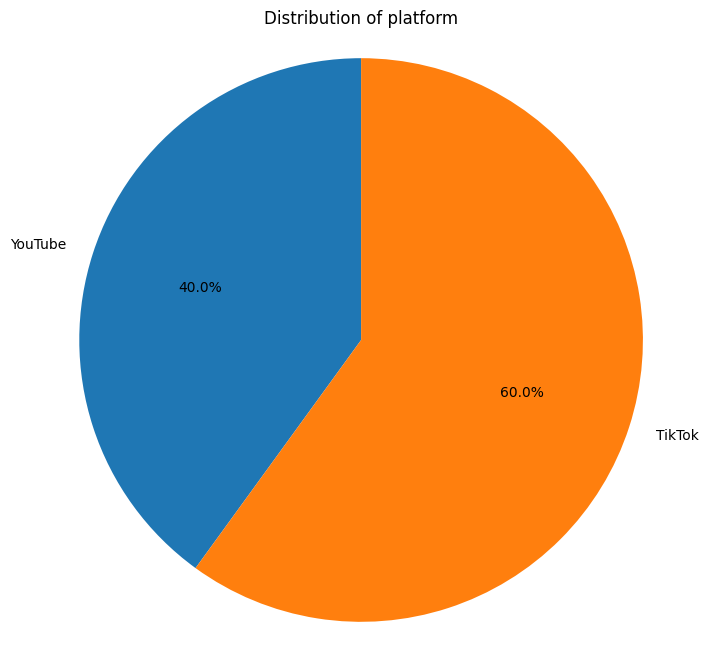

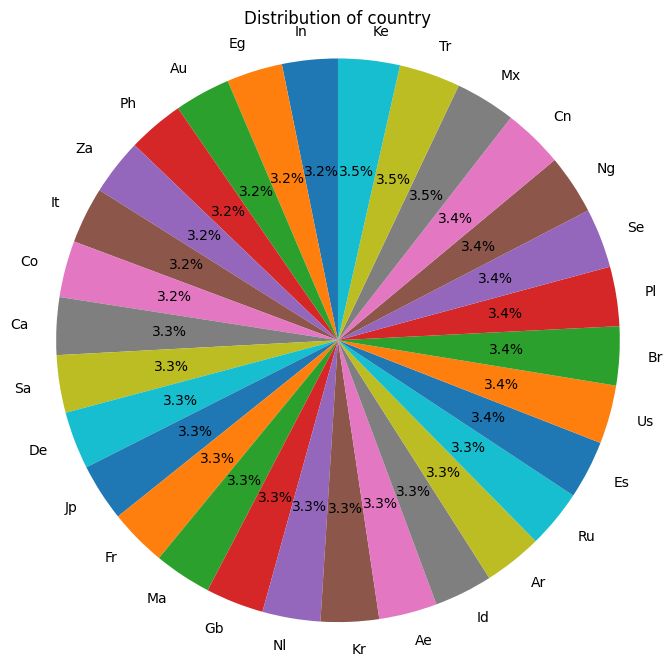

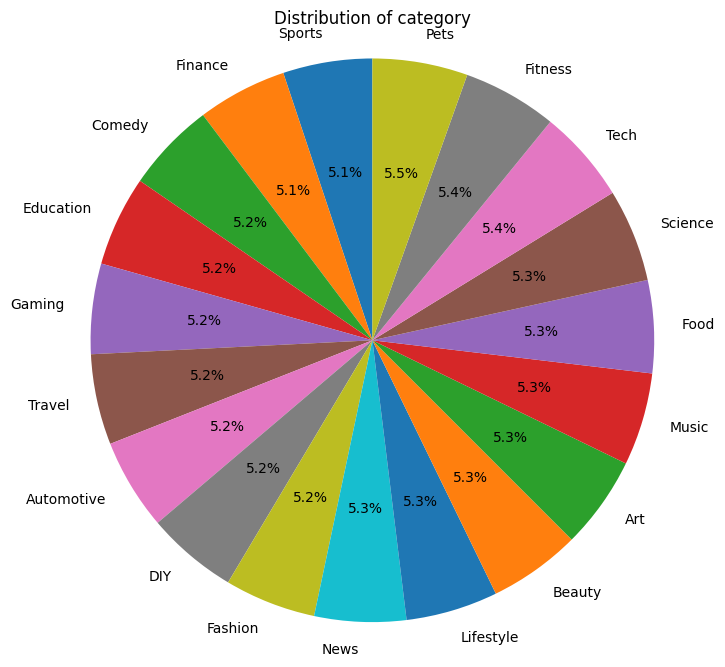

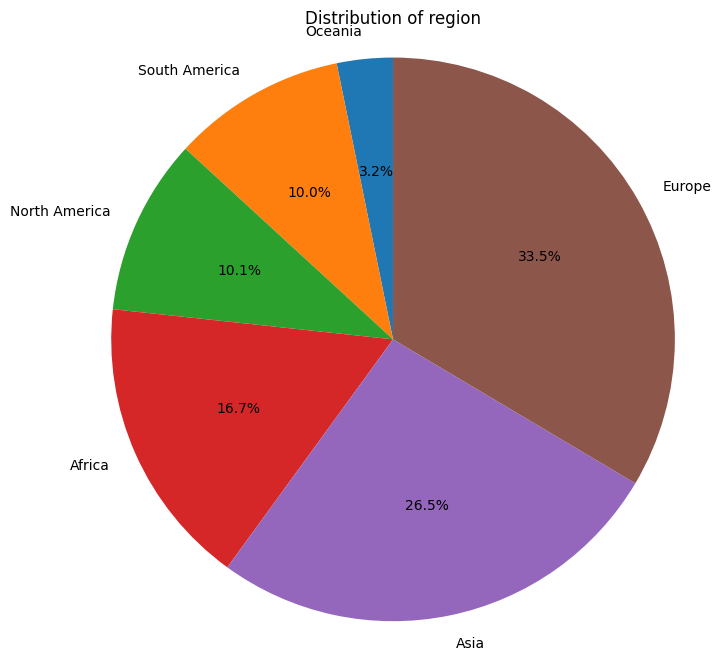

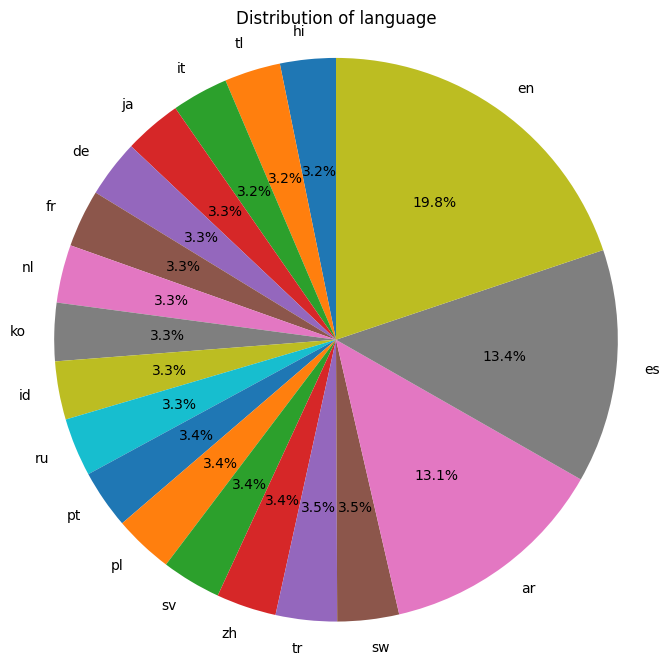

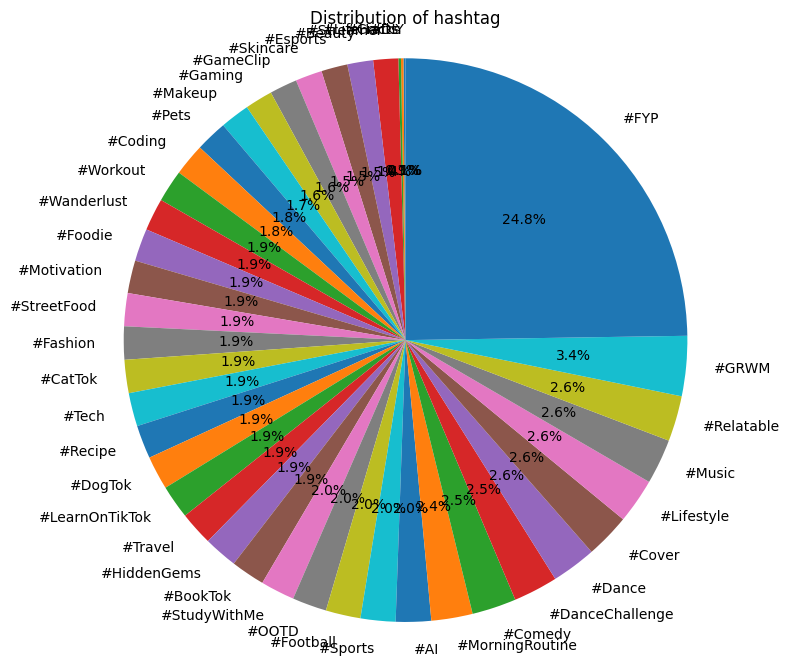

--- End of EDA ---



In [107]:
# EDA the dataset (shorts_vs_tiktok)
# Objective: To explore the dataset and understand the distribution of key metrics across different platforms and countries.
# What you'll do: Use descriptive statistics and visualizations to analyze the distribution of views, likes, comments, shares, and completion rates across YouTube Shorts and TikTok. You can create histograms, box plots, and scatter plots to visualize these distributions.
# Expected outcome: A comprehensive overview of how engagement metrics vary between the two platforms and across different countries.
print("Exploratory Data Analysis (EDA) of the shorts_vs_tiktok dataset:")
# Change format of date columns
shorts_vs_tiktok = shorts_vs_tiktok.with_columns([
    pl.col("publish_date_approx").str.strptime(pl.Date, "%Y-%m-%d"),
    pl.col("year_month").str.strptime(pl.Date, "%Y-%m")
])
print("Data types after conversion:")
display(shorts_vs_tiktok.schema)
    
piechart_sns(shorts_vs_tiktok, 'platform')
piechart_sns(shorts_vs_tiktok, 'country')
piechart_sns(shorts_vs_tiktok, 'category')
piechart_sns(shorts_vs_tiktok, 'region')
piechart_sns(shorts_vs_tiktok, 'language')
piechart_sns(shorts_vs_tiktok, 'hashtag')

print("--- End of EDA ---\n")

Displaying the distribution of float64 columns in shorts_vs_tiktok dataset.


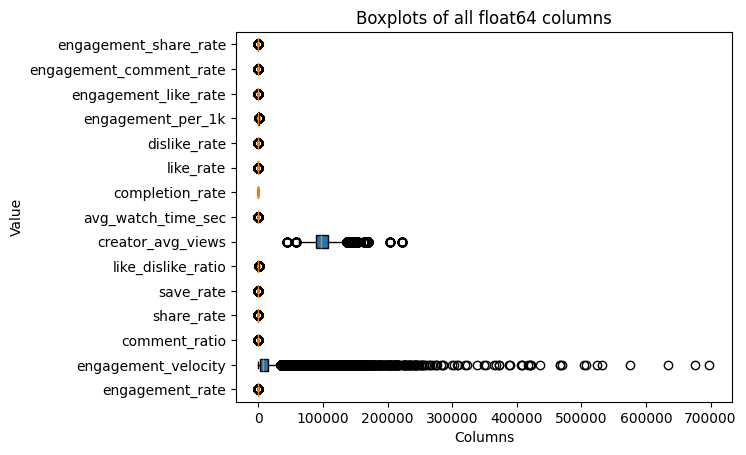

There are 15 float64 columns in the df dataset.


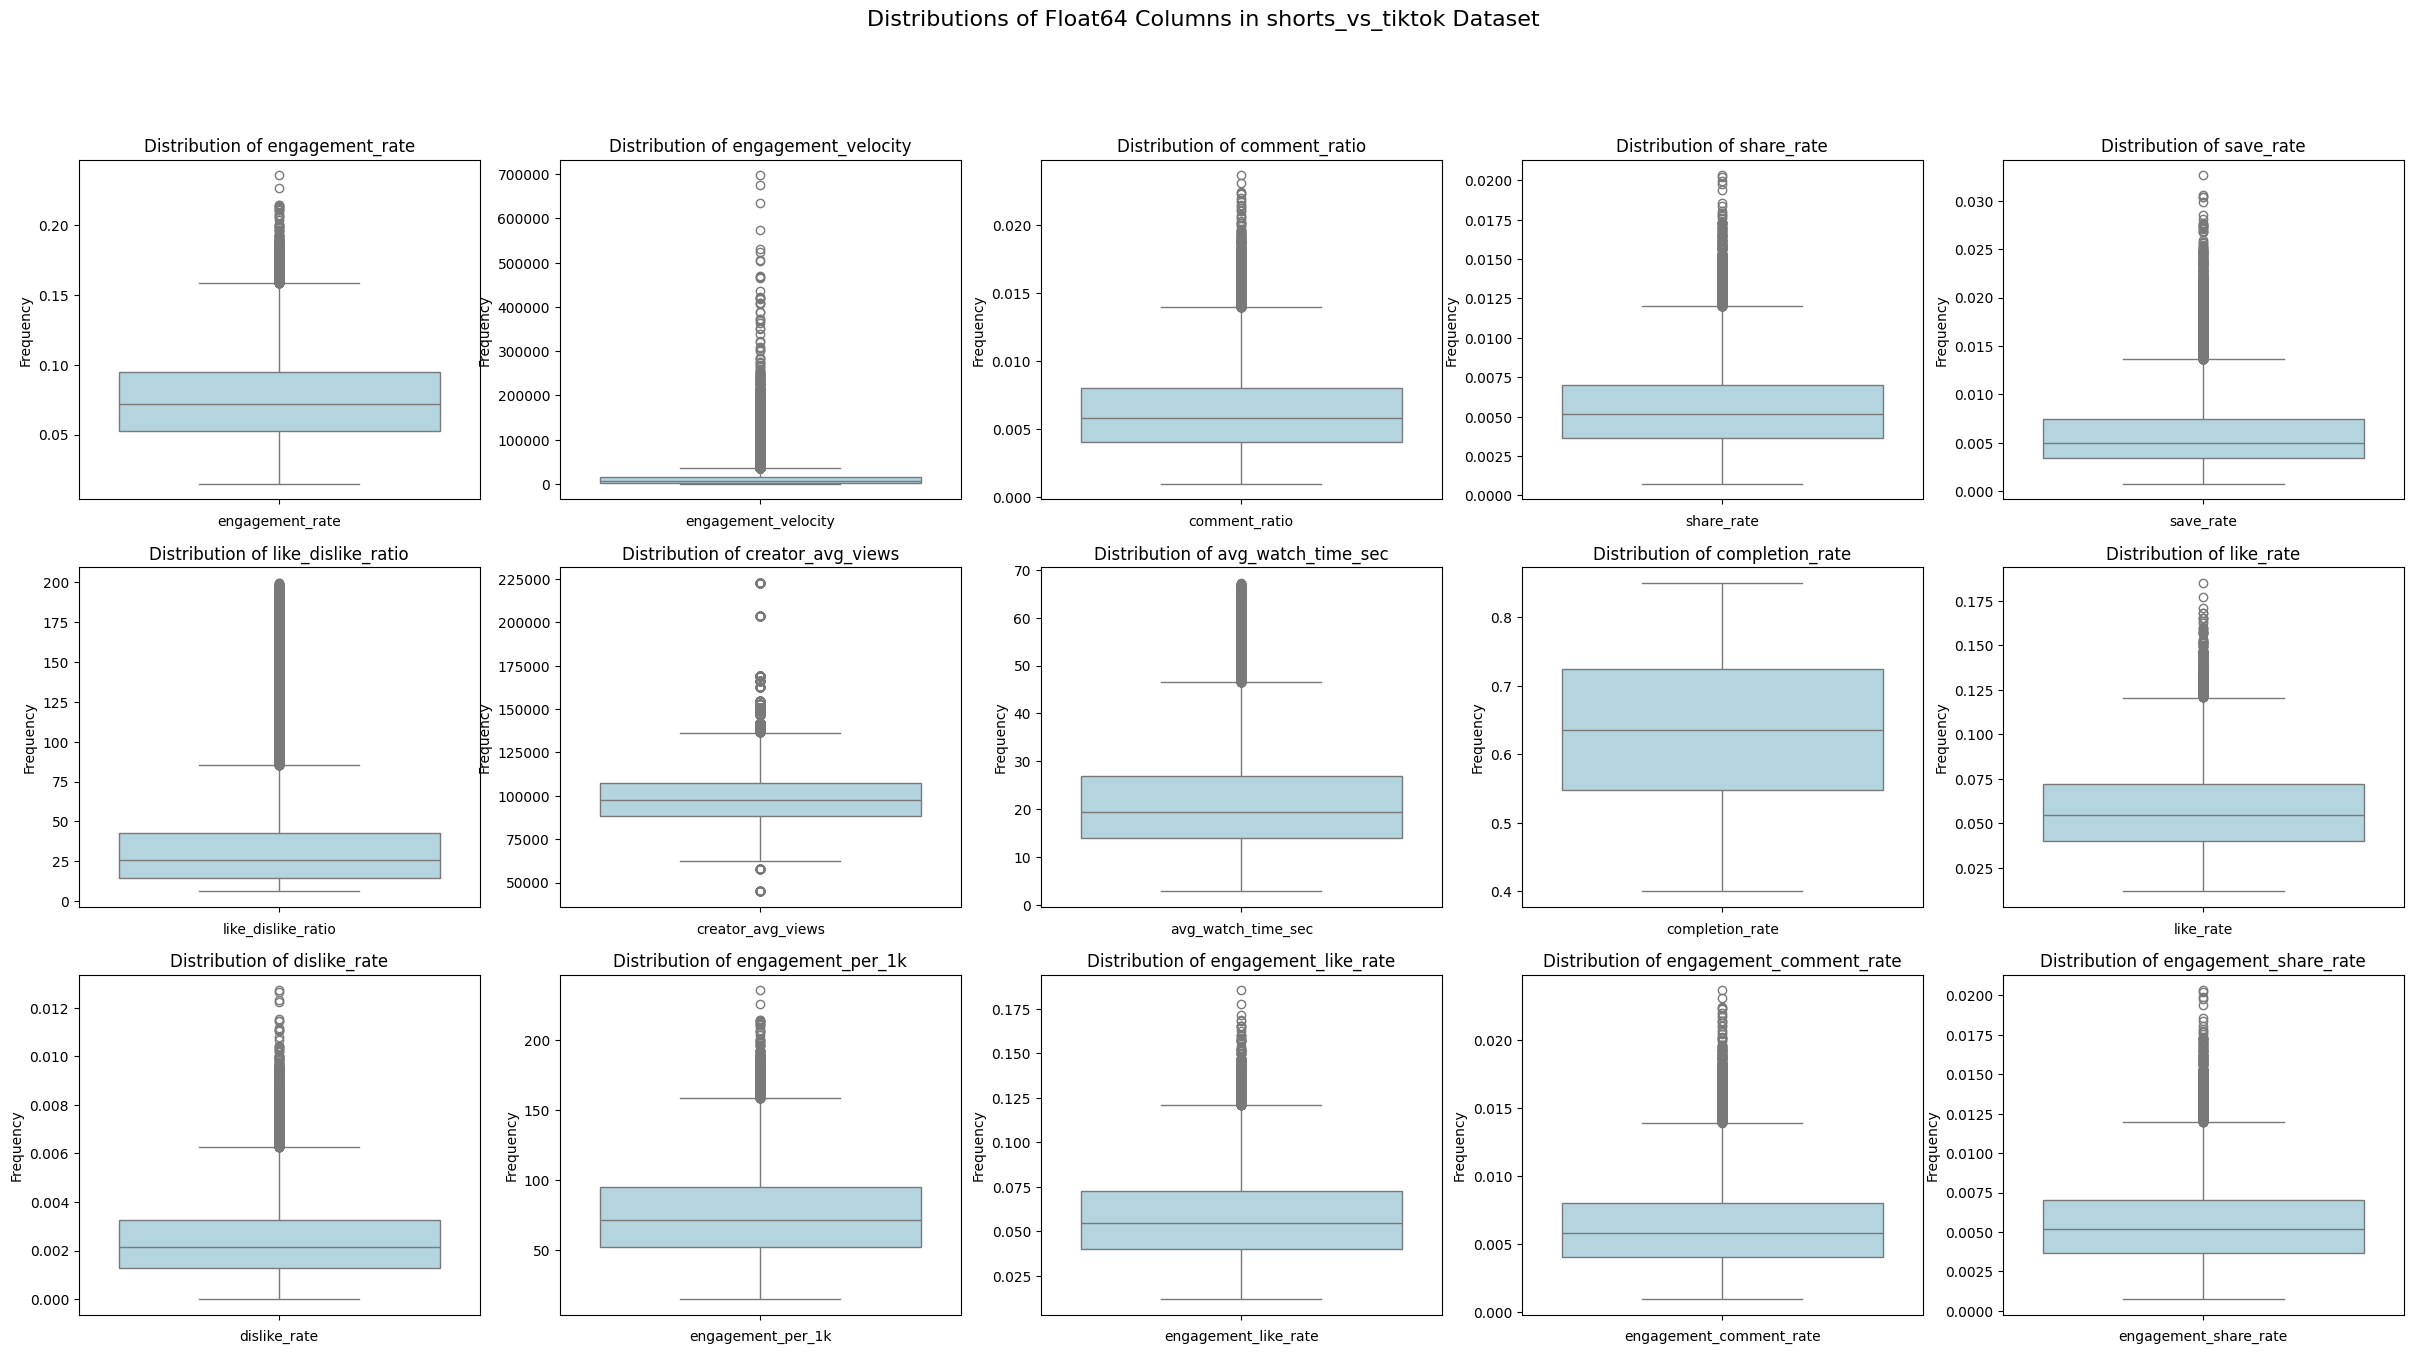

----------------------------------------------------------------

Displaying the distribution of float64 columns in top_creators dataset.


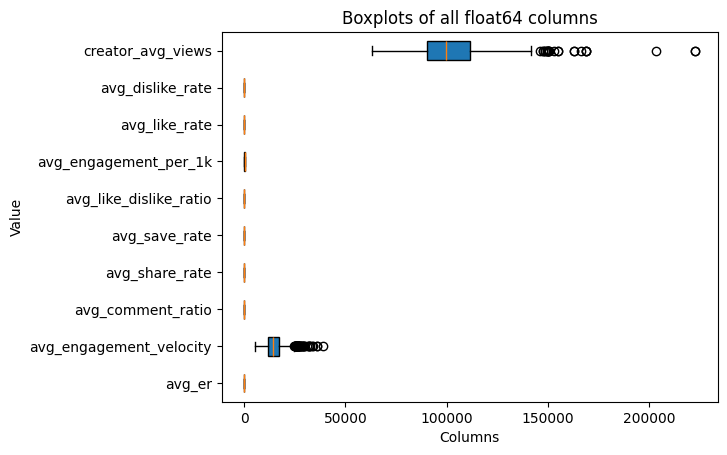

There are 10 float64 columns in the df dataset.


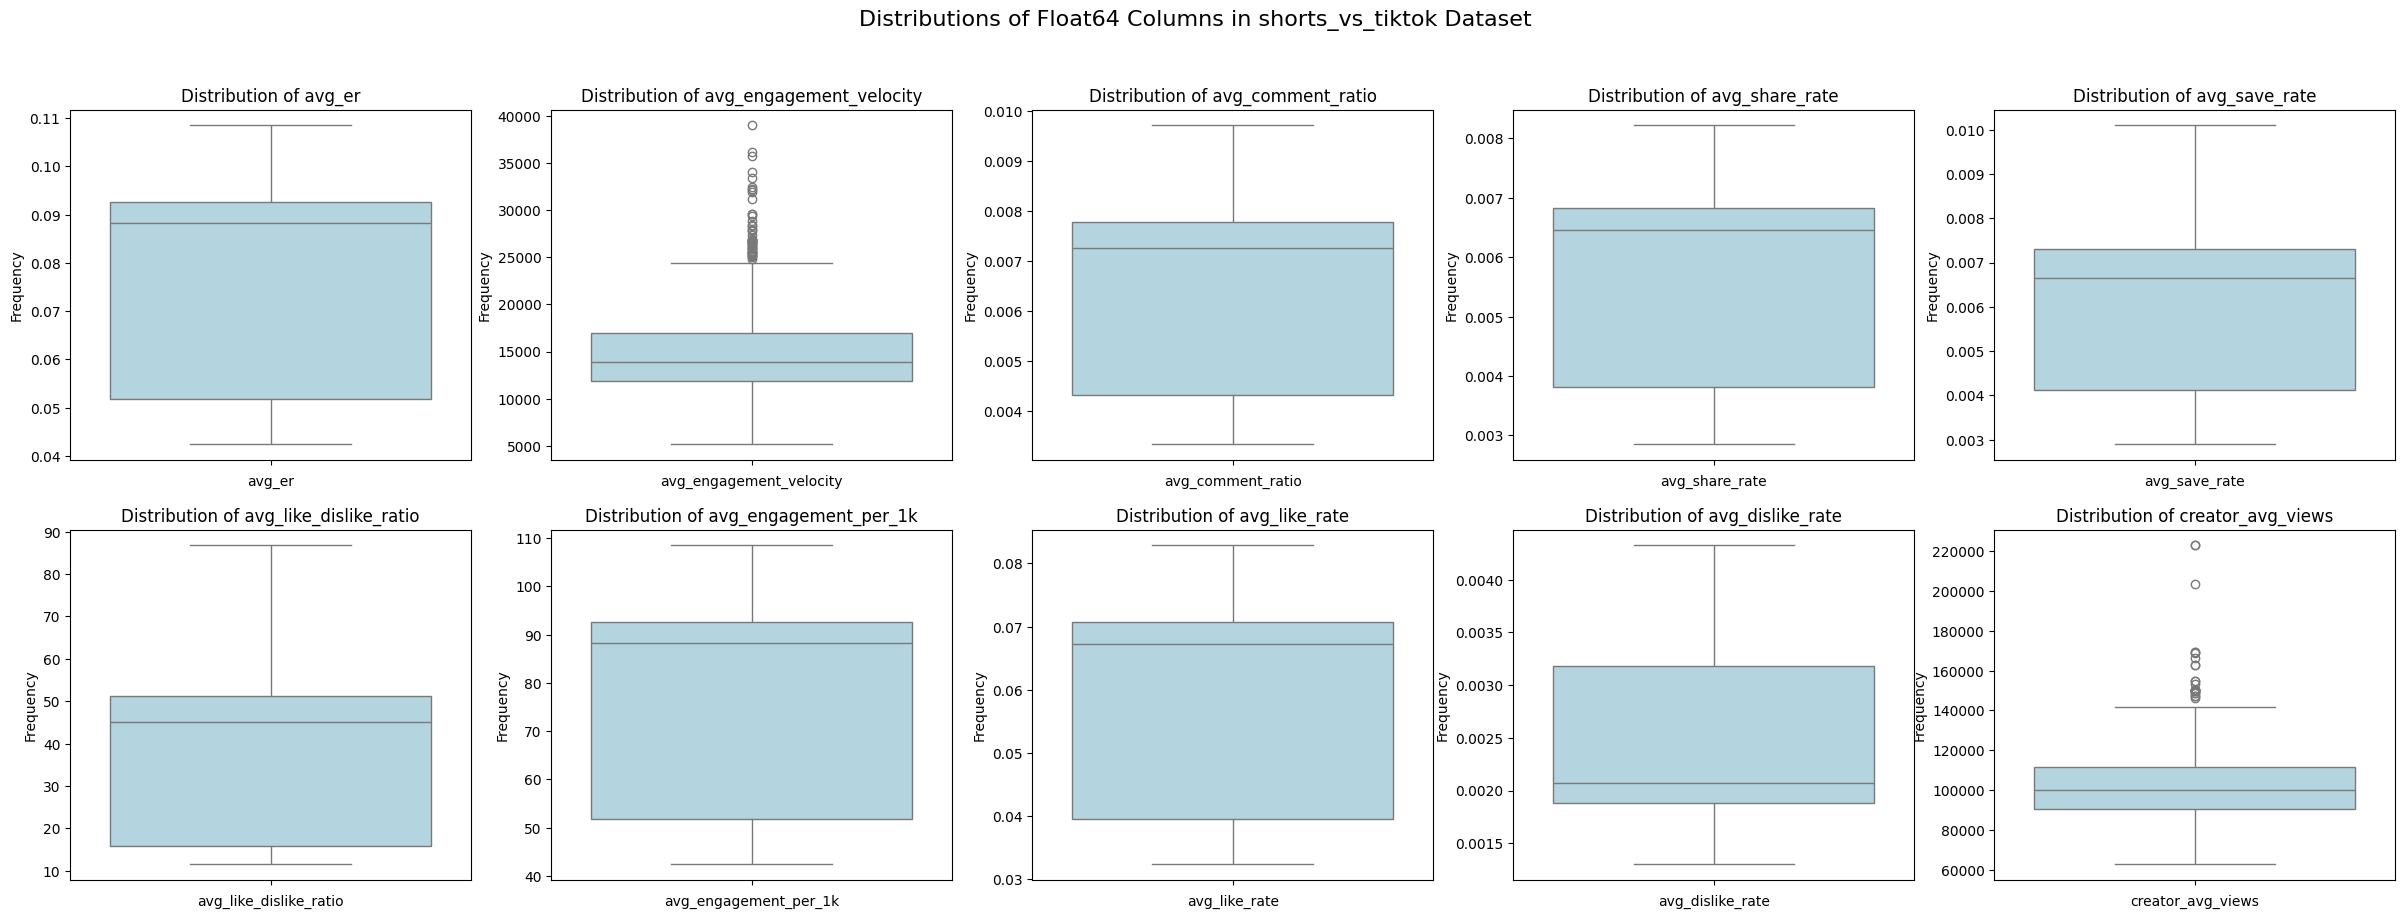

----------------------------------------------------------------

Displaying the distribution of float64 columns in top_hashtags dataset.


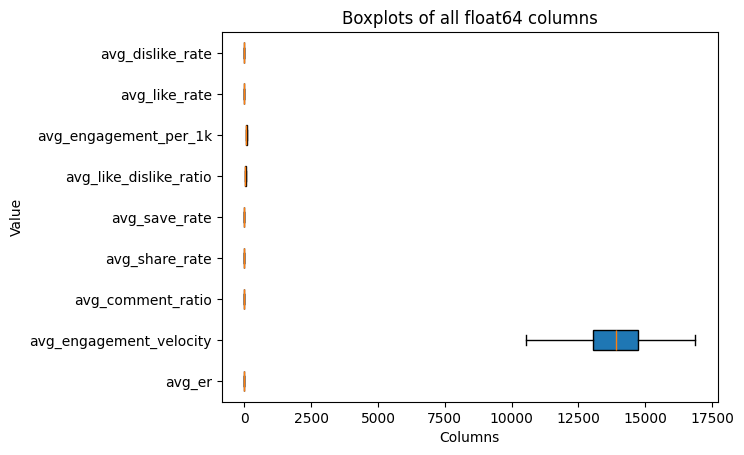

There are 9 float64 columns in the df dataset.


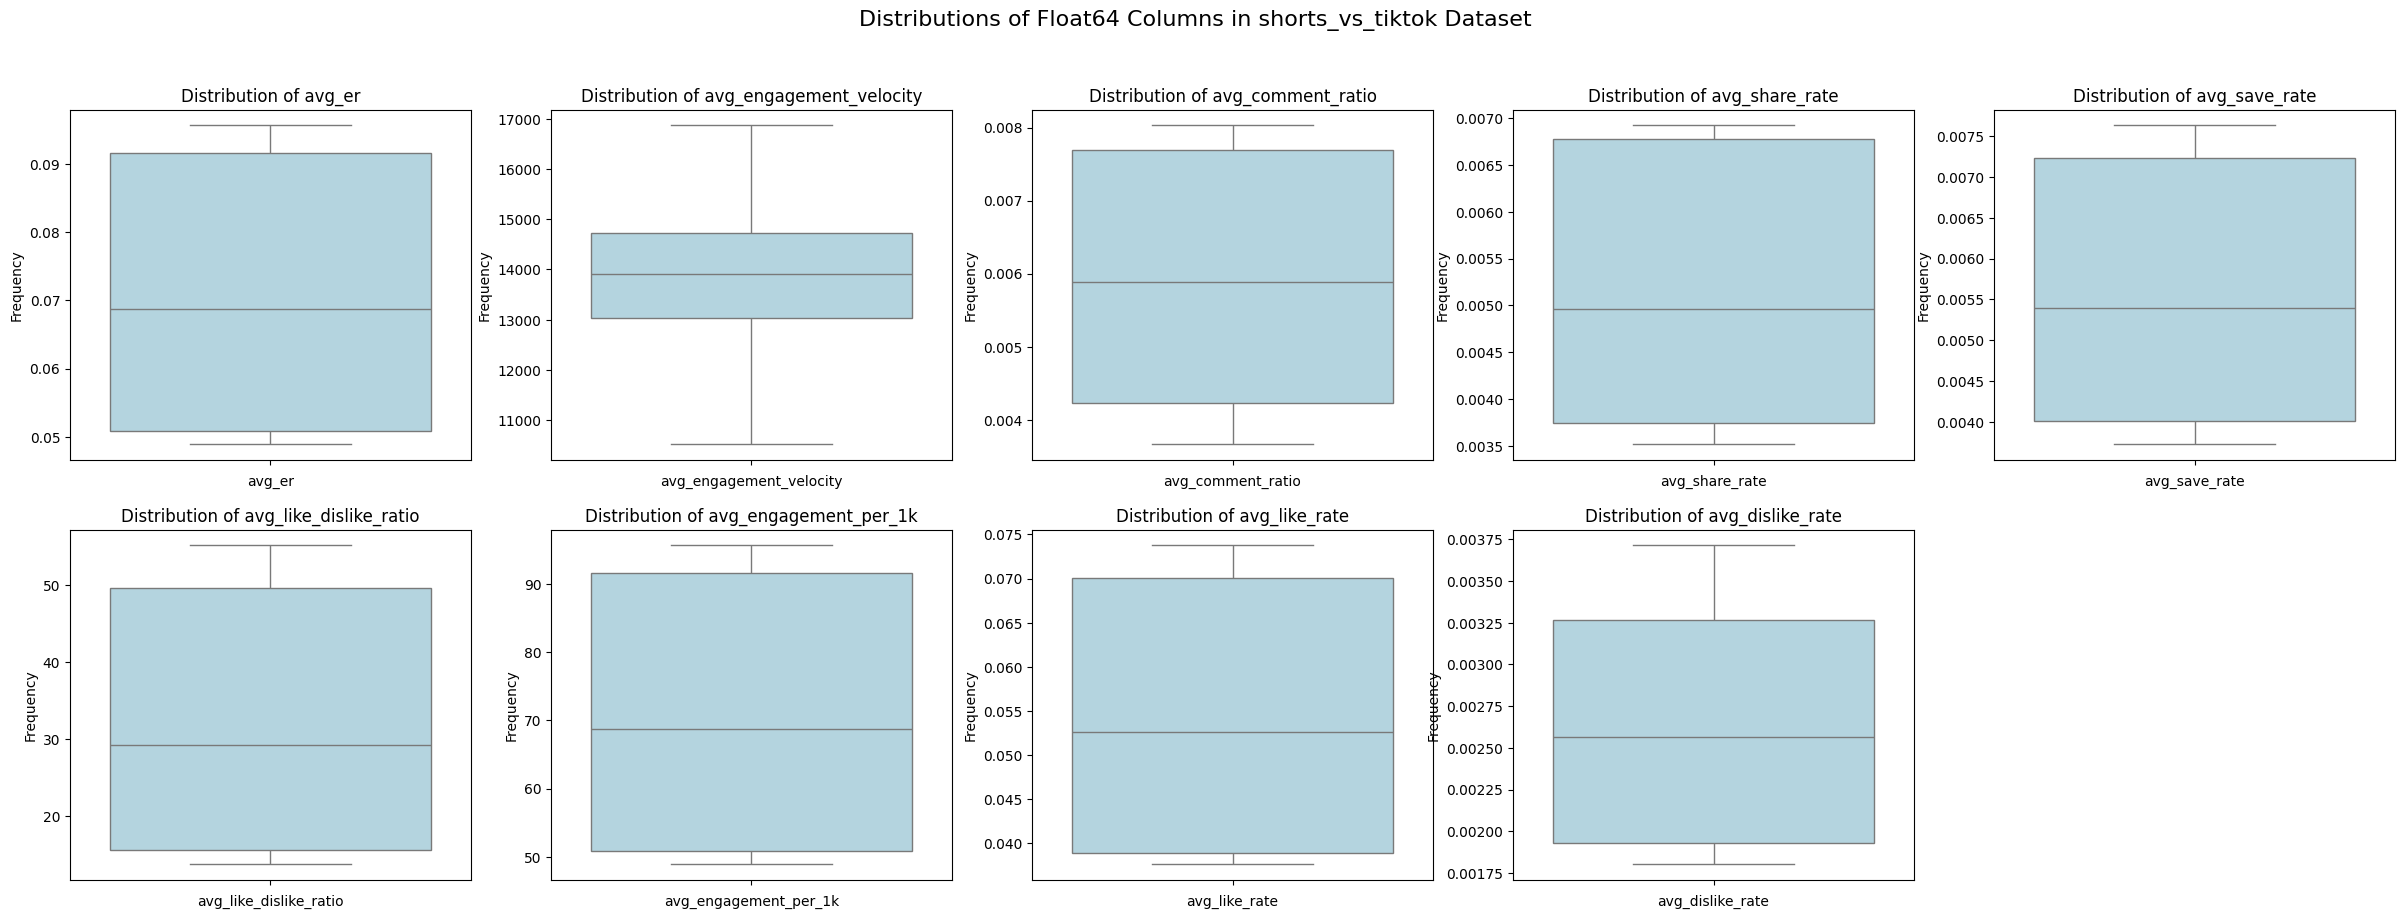

----------------------------------------------------------------

Displaying the distribution of float64 columns in monthly_trends dataset.


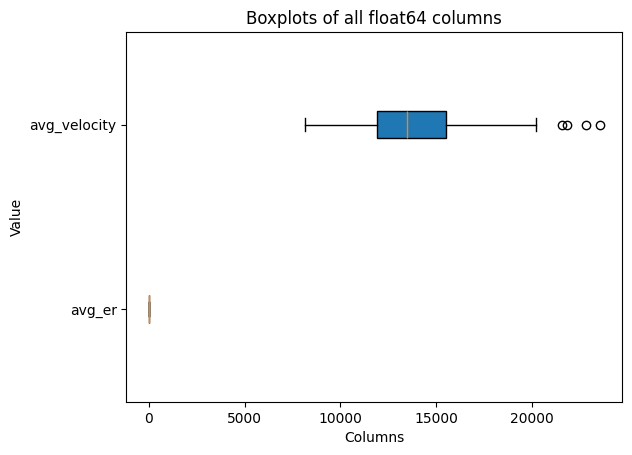

There are 2 float64 columns in the df dataset.


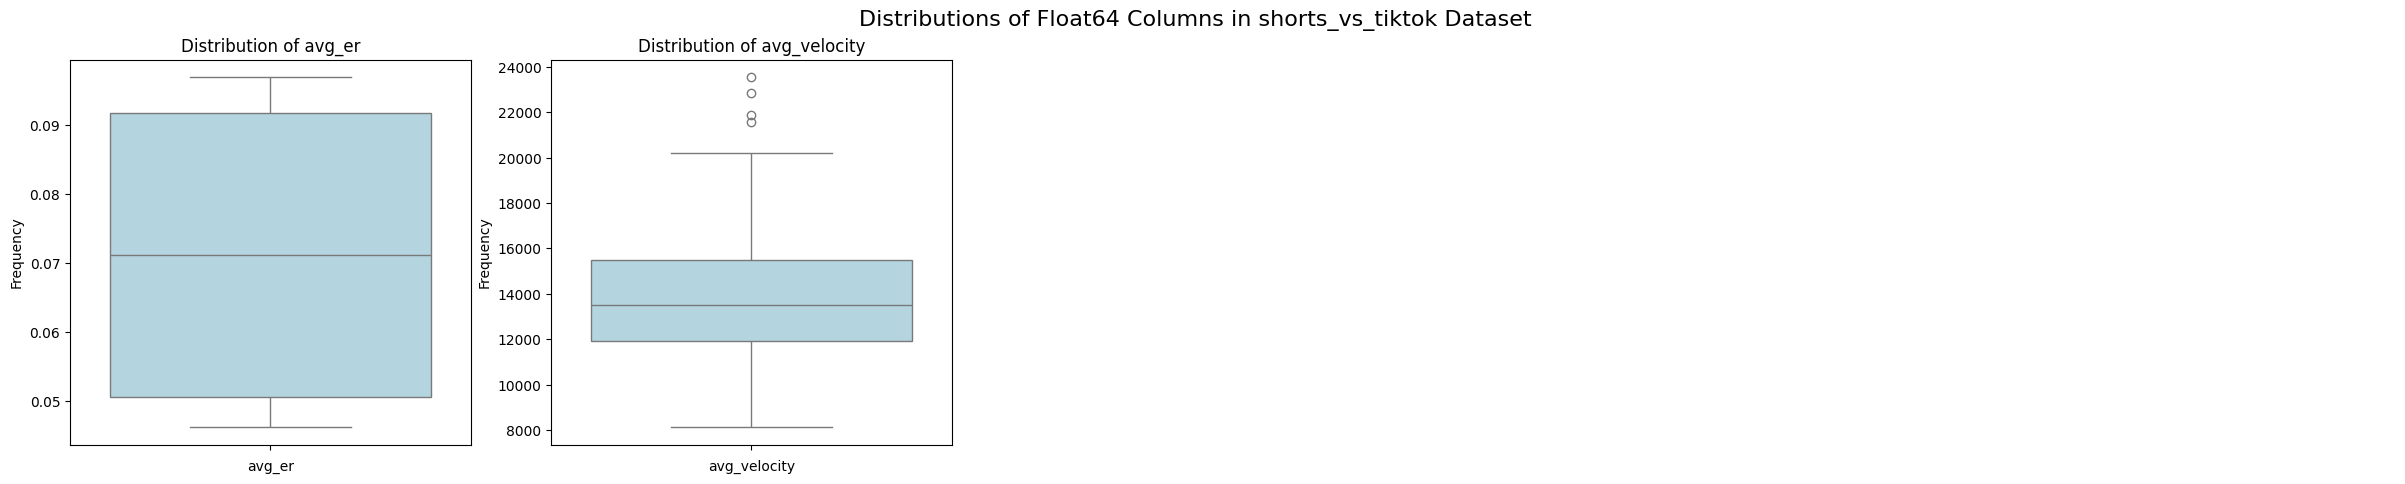

----------------------------------------------------------------

Displaying the distribution of float64 columns in platform_summary dataset.


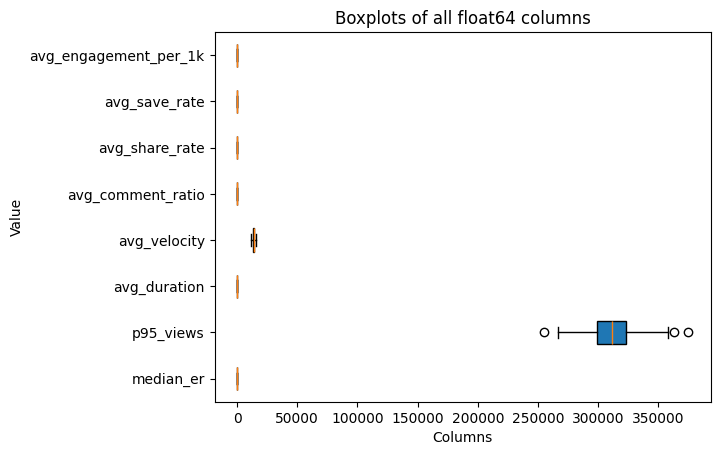

There are 8 float64 columns in the df dataset.


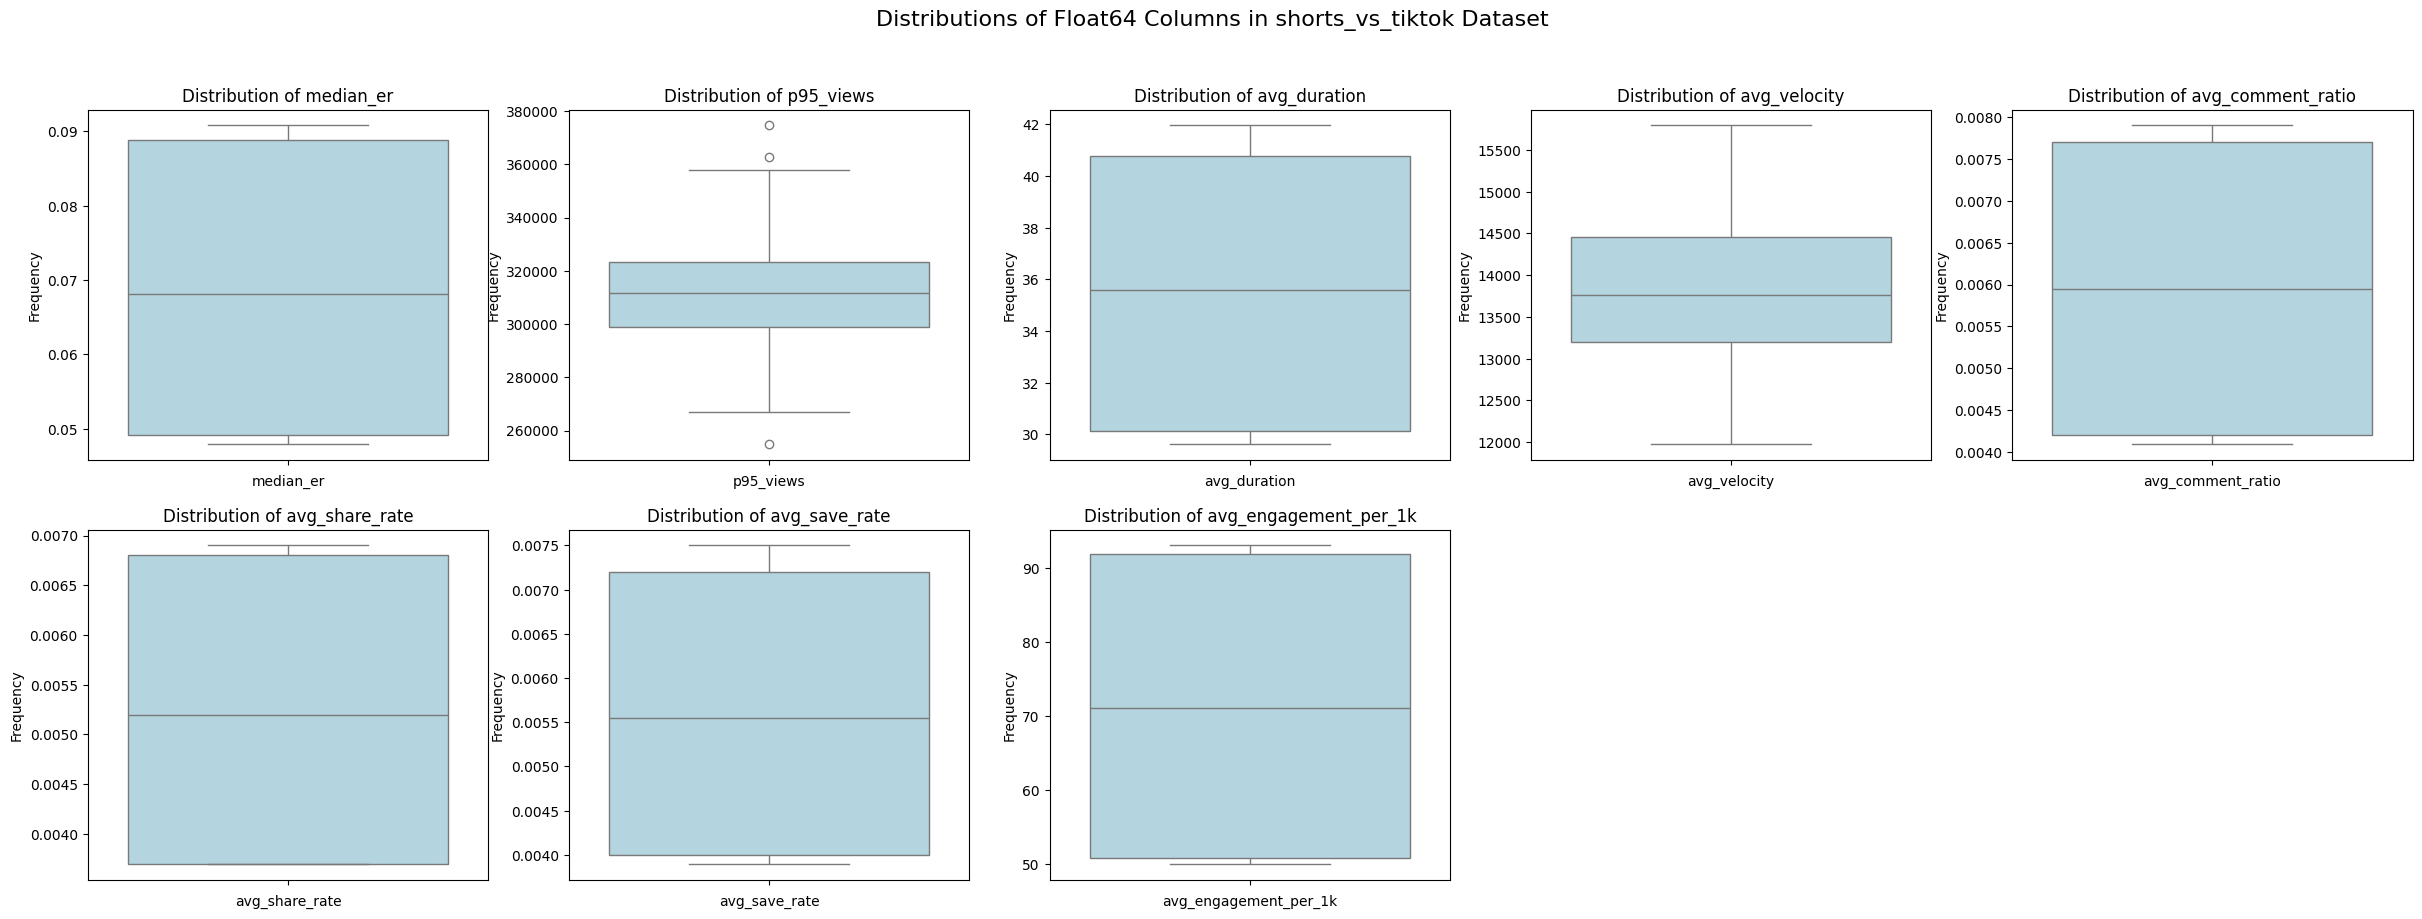

----------------------------------------------------------------



In [108]:
# Distribution of float64 columns   
float64_distribution(shorts_vs_tiktok, 5, 'shorts_vs_tiktok')
float64_distribution(top_creators, 5, 'top_creators')
float64_distribution(top_hashtags, 5, 'top_hashtags')
float64_distribution(monthly_trends, 5, 'monthly_trends')
float64_distribution(platform_summary, 5, 'platform_summary')


In [109]:
datasets = {
    'monthly_trends': pl.read_csv('Dataset/monthly_trends_2025.csv'),
    'top_creators': pl.read_csv('Dataset/top_creators_impact_2025.csv'),
    'top_hashtags': pl.read_csv('Dataset/top_hashtags_2025.csv'),
    'shorts_vs_tiktok': pl.read_csv('Dataset/youtube_shorts_tiktok_trends_2025.csv'),
    'platform_summary': pl.read_csv('Dataset/country_platform_summary_2025.csv'),
    'Data_dictionary': pl.read_csv('Dataset/DATA_DICTIONARY.csv')
}
data_dict = datasets['Data_dictionary'].sort('column')

columns_to_check = data_dict['column'].to_list()
description_to_add = data_dict['description'].to_list()

# Create a dictionary to hold the results
summary_data = {dataset_name: [] for dataset_name in datasets.keys()}

for col in columns_to_check:
    for dataset_name, df in datasets.items():
        # Check if the column exists in the current DataFrame
        if col in df.columns:
            summary_data[dataset_name].append('✓')
        else:
            summary_data[dataset_name].append('') # Empty string for better visualization

# Add the columns to check as a list in the summary data
summary_data['Column Name'] = columns_to_check
summary_data['Description'] = description_to_add

# Convert the summary data to a Polars DataFrame
summary_table = pl.DataFrame(summary_data)

# Reorder the columns so that 'Column Name' is first
ordered_cols = ['Column Name'] + list(datasets.keys()) + ['Description']
summary_table = summary_table.select(ordered_cols)

# Display the final table
with pl.Config(tbl_rows=-1, tbl_cols=-1, fmt_str_lengths=200):
    display(summary_table)


Column Name,monthly_trends,top_creators,top_hashtags,shorts_vs_tiktok,platform_summary,Data_dictionary,Description
str,str,str,str,str,str,str,str
"""author_handle""","""""","""✓""","""""","""✓""","""""","""""","""Creator handle/channel (brand-like, synthetic)"""
"""avg_watch_time_sec""","""""","""""","""""","""✓""","""""","""""","""Estimated average watch time (seconds)"""
"""category""","""""","""""","""""","""✓""","""""","""""","""Video category (if available)"""
"""comment_ratio""","""""","""""","""""","""✓""","""""","""""","""comments / views"""
"""comments""","""""","""""","""✓""","""✓""","""""","""""","""Comments count"""
"""completion_rate""","""""","""""","""""","""✓""","""""","""""","""avg_watch_time_sec / duration_sec"""
"""country""","""✓""","""""","""""","""✓""","""✓""","""""","""Country ISO-2 code"""
"""creator_avg_views""","""""","""✓""","""""","""✓""","""""","""""","""Avg views per video for the creator (across dataset rows)"""
"""creator_tier""","""""","""""","""""","""✓""","""""","""""","""Creator tier based on avg views: Micro / Mid / Macro / Star"""


Top 10 most engagemen profiles?

In [110]:
display(shorts_vs_tiktok.head(5))

platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,week_of_year,duration_sec,views,likes,comments,shares,saves,engagement_rate,trend_label,source_hint,notes,device_type,upload_hour,genre,trend_duration_days,trend_type,engagement_velocity,dislikes,comment_ratio,share_rate,save_rate,like_dislike_ratio,publish_dayofweek,publish_period,event_season,tags,sample_comments,creator_avg_views,creator_tier,season,publish_date_approx,year_month,title,title_length,has_emoji,avg_watch_time_sec,completion_rate,device_brand,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,f64,str,str,str,str,i64,str,i64,str,f64,i64,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,date,date,str,i64,i64,f64,f64,str,str,i64,str,i64,f64,f64,f64,f64,f64,f64
"""TikTok""","""Jp""","""Asia""","""ja""","""Gaming""","""#Lifestyle""","""Night Routine — College""","""NextVision""","""trending""","""8bit loop""",1,40,252497,21755,3170,1977,3415,0.120069,"""rising""","""TikTok Creative Center""","""split-screen""","""Android""",15,"""Lifestyle""",4,"""Short""",63124.25,1011,0.012555,0.00783,0.013525,21.497036,"""Saturday""","""Afternoon""","""Regular""","""daily, lifestyle, motivation""","""ずっと見ちゃう😂""",96474.3,"""Mid""","""Spring""",2025-01-04,2025-01-01,"""Night Routine — Productivity 🏖…",31,1,25.8,0.645,"""iPhone""","""External""",1,"""2e681528d17a1fe1986857942536ec…",30317,0.086159,0.004004,120.069,0.086159,0.012555,0.00783
"""TikTok""","""Se""","""Europe""","""sv""","""Food""","""#Sports""","""Morning Routine — College""","""DailyVlogsDiego""","""trending""","""Street vibe""",1,18,270580,23080,2124,2108,3265,0.113005,"""declining""","""TikTok Creative Center""","""greenscreen""","""Android""",3,"""Sports""",56,"""Evergreen""",4831.79,655,0.00785,0.007791,0.012067,35.182927,"""Wednesday""","""Night""","""Regular""","""gym, football, workout""","""This is fire 🔥""",104638.4,"""Mid""","""Fall""",2025-01-01,2025-01-01,"""Football skills in 60s 📱""",24,1,10.4,0.578,"""iPhone""","""Search""",0,"""2e35fa0b2978b9cae635839c1d4e9e…",30577,0.085298,0.002421,113.005,0.085298,0.00785,0.007791
"""TikTok""","""Za""","""Africa""","""en""","""Art""","""#Workout""","""Night Routine — College""","""BeyondHub""","""licensed""","""Gallery pad""",1,22,7385,363,33,38,69,0.068111,"""seasonal""","""TikTok Creative Center""","""subtitles""","""Android""",15,"""Sports""",11,"""Medium""",671.36,12,0.004469,0.005146,0.009343,27.923077,"""Sunday""","""Afternoon""","""Regular""","""football, gym, workout""","""Instant like!""",108139.9,"""Mid""","""Fall""",2025-01-05,2025-01-01,"""Football skills in 60s""",22,0,11.7,0.532,"""Huawei""","""External""",1,"""0d88a011235a82244995ef52961f95…",503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
"""TikTok""","""Kr""","""Asia""","""ko""","""News""","""#Esports""","""Best Settings for Fortnite""","""NextHub""","""original""","""Neutral piano""",1,36,72377,6243,811,383,391,0.108156,"""declining""","""Open Web Samples""","""cinematic b-roll""","""Android""",15,"""Gaming""",10,"""Medium""",7237.7,229,0.011205,0.005292,0.005402,27.143478,"""Friday""","""Afternoon""","""SummerBreak""","""fps, esports, clips, gaming, v…","""Can’t stop watching 😂""",102133.2,"""Mid""","""Summer""",2025-01-03,2025-01-01,"""Pro Tips for Valorant in 60s 🎮""",30,1,23.7,0.658,"""Huawei""","""Search""",1,"""e15cff7621ed3f9eb9d2c97c841be0…",7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
"""TikTok""","""Au""","""Oceania""","""en""","""Beauty""","""#Comedy""","""When your friend is Beginners""","""LucasOfficial""","""licensed""","""Soft glam loop""",1,35,16174,832,68,67,204,0.0724,"""seasonal""","""TikTok Creative Center""","""text-to-speech""","""Android""",18,"""Comedy""",6,"""Short""",2695.67,19,0.004204,0.004142,0.012613,41.6,"""Saturday""","""Evenin

In [111]:
#Top 10 most engagemen profiles?
data_temp = datasets['shorts_vs_tiktok']

creator_engagement = data_temp.group_by("author_handle").agg(
    pl.sum("engagement_total").alias("total_engagement")
)

top_10_profiles = creator_engagement.sort("total_engagement", descending=True).head(10)

print(top_10_profiles)

shape: (10, 2)
┌───────────────┬──────────────────┐
│ author_handle ┆ total_engagement │
│ ---           ┆ ---              │
│ str           ┆ i64              │
╞═══════════════╪══════════════════╡
│ UrbanVision   ┆ 2081697          │
│ StreetVision  ┆ 2021572          │
│ NextMedia     ┆ 1898773          │
│ BeyondStudio  ┆ 1889351          │
│ VividWorks    ┆ 1867868          │
│ VividLabs     ┆ 1755279          │
│ BeyondHub     ┆ 1750789          │
│ PrimeMedia    ┆ 1749156          │
│ UrbanWorks    ┆ 1721158          │
│ NextVision    ┆ 1711332          │
└───────────────┴──────────────────┘


shape: (10, 3)
┌─────────────────┬─────────────┬─────────────┐
│ hashtag         ┆ total_views ┆ total_likes │
│ ---             ┆ ---         ┆ ---         │
│ str             ┆ i64         ┆ i64         │
╞═════════════════╪═════════════╪═════════════╡
│ #FYP            ┆ 1183328006  ┆ 67895369    │
│ #GRWM           ┆ 169284504   ┆ 9754921     │
│ #Music          ┆ 126266286   ┆ 7108053     │
│ #Lifestyle      ┆ 123870251   ┆ 7146446     │
│ #Relatable      ┆ 123550931   ┆ 7158596     │
│ #Comedy         ┆ 122338553   ┆ 7381913     │
│ #Dance          ┆ 120338073   ┆ 6925571     │
│ #DanceChallenge ┆ 118139016   ┆ 7021841     │
│ #Cover          ┆ 117436369   ┆ 6695330     │
│ #MorningRoutine ┆ 114783885   ┆ 6812785     │
└─────────────────┴─────────────┴─────────────┘


/var/folders/ls/wy4qgx7s13s6gz_y3b3x_xv80000gn/T/ipykernel_97758/1185815296.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_profiles['hashtag'], rotation=45, ha='right')


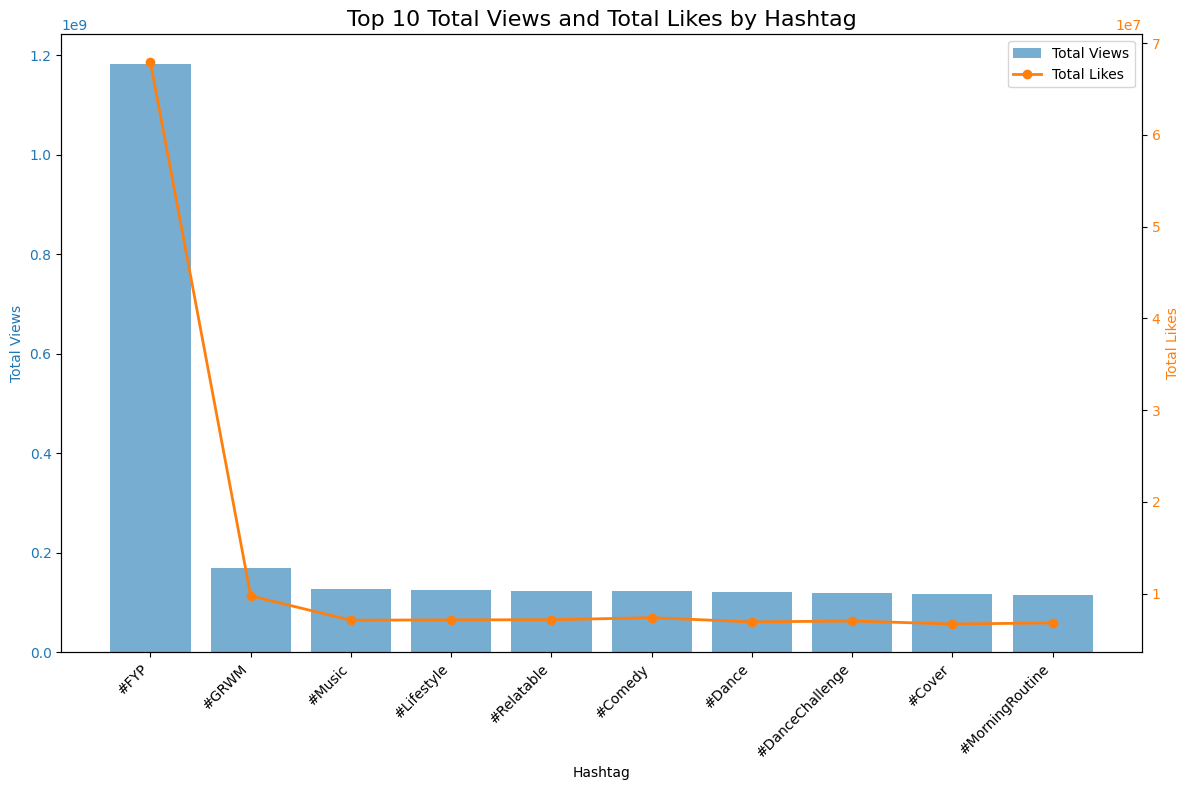

In [112]:
#Top 10 hastags with most views?
data_temp = datasets['shorts_vs_tiktok']

creator_engagement = data_temp.group_by("hashtag").agg(
    pl.sum("views").alias("total_views"),
    pl.sum("likes").alias("total_likes")
)

top_10_profiles = creator_engagement.sort("total_views", descending=True).head(10)

print(top_10_profiles)

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot 'total_views' on the first axis as a bar chart
color1 = 'tab:blue'
ax1.set_xlabel('Hashtag')
ax1.set_ylabel('Total Views', color=color1)
ax1.bar(top_10_profiles['hashtag'], top_10_profiles['total_views'], color=color1, alpha=0.6, label='Total Views')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(top_10_profiles['hashtag'], rotation=45, ha='right')

# Create a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot 'total_likes' on the second axis as a line plot
color2 = 'tab:orange'
ax2.set_ylabel('Total Likes', color=color2)
ax2.plot(top_10_profiles['hashtag'], top_10_profiles['total_likes'], color=color2, marker='o', linestyle='-', linewidth=2, label='Total Likes')
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Top 10 Total Views and Total Likes by Hashtag', fontsize=16)
plt.tight_layout()
plt.show()


In [113]:
# Trend Identification & Analysis
# data_temp = datasets['shorts_vs_tiktok']
# display(data_temp['trend_label'].unique())

views_videos = data_temp.group_by("country","platform").agg(
    pl.sum("views").alias("total_views"),
    pl.count("row_id").alias("number_of_videos"),
    pl.mean("completion_rate"),
    pl.mean("engagement_rate"),
    pl.mean("engagement_per_1k")
).sort(by=["country","platform"])
display(views_videos.sort(by="total_views", descending=True))

top_youtube = views_videos.filter(pl.col("platform") == "YouTube").sort(by =["total_views","number_of_videos"], descending= True).head(10)
top_tiktok = views_videos.filter(pl.col("platform") == "TikTok").sort(by =["total_views","number_of_videos"], descending= True).head(10)
print("Top 10 each platform by total views")
display(top_youtube)
display(top_tiktok)

print(f"Top 10 country with most views on YouTube Short : {top_youtube['country'].to_list()}")
print(f"Top 10 country with most views on TikTok : {top_tiktok['country'].to_list()}")

country,platform,total_views,number_of_videos,completion_rate,engagement_rate,engagement_per_1k
str,str,i64,u32,f64,f64,f64
"""Pl""","""TikTok""",104027786,993,0.672642,0.091467,91.466592
"""Kr""","""TikTok""",102835042,993,0.675671,0.09156,91.560403
"""Ke""","""TikTok""",102219088,1033,0.674214,0.092377,92.376854
"""Nl""","""TikTok""",101151851,953,0.672257,0.090206,90.206273
"""Es""","""TikTok""",100814252,976,0.673151,0.09196,91.960147
…,…,…,…,…,…,…
"""Eg""","""YouTube""",57304484,619,0.575057,0.051426,51.42553
"""Jp""","""YouTube""",56248413,598,0.577617,0.050913,50.913072
"""Ar""","""YouTube""",55961194,612,0.575969,0.050355,50.355062


Top 10 each platform by total views


country,platform,total_views,number_of_videos,completion_rate,engagement_rate,engagement_per_1k
str,str,i64,u32,f64,f64,f64
"""Ru""","""YouTube""",69669553,680,0.568363,0.050639,50.638937
"""Id""","""YouTube""",69548514,678,0.569614,0.051128,51.127692
"""Mx""","""YouTube""",69411185,707,0.571917,0.051816,51.816057
"""Gb""","""YouTube""",69301389,640,0.575875,0.0502,50.200086
"""Br""","""YouTube""",69228673,683,0.57042,0.05012,50.119531
"""Ma""","""YouTube""",69189433,643,0.57649,0.051057,51.057443
"""Ng""","""YouTube""",69182519,673,0.579272,0.0502,50.199975
"""Sa""","""YouTube""",67492748,654,0.572243,0.050826,50.826448
"""De""","""YouTube""",67160751,642,0.57783,0.051041,51.041111


country,platform,total_views,number_of_videos,completion_rate,engagement_rate,engagement_per_1k
str,str,i64,u32,f64,f64,f64
"""Pl""","""TikTok""",104027786,993,0.672642,0.091467,91.466592
"""Kr""","""TikTok""",102835042,993,0.675671,0.09156,91.560403
"""Ke""","""TikTok""",102219088,1033,0.674214,0.092377,92.376854
"""Nl""","""TikTok""",101151851,953,0.672257,0.090206,90.206273
"""Es""","""TikTok""",100814252,976,0.673151,0.09196,91.960147
"""Ar""","""TikTok""",100095356,997,0.674497,0.090229,90.228727
"""De""","""TikTok""",99957258,946,0.677001,0.090449,90.44899
"""Ae""","""TikTok""",99711690,992,0.677824,0.09243,92.42974
"""Ca""","""TikTok""",98768387,960,0.67586,0.092738,92.737833


Top 10 country with most views on YouTube Short : ['Ru', 'Id', 'Mx', 'Gb', 'Br', 'Ma', 'Ng', 'Sa', 'De', 'Ke']
Top 10 country with most views on TikTok : ['Pl', 'Kr', 'Ke', 'Nl', 'Es', 'Ar', 'De', 'Ae', 'Ca', 'Id']


In [117]:
rank_view = (
    top_youtube
    .sort("total_views", descending=True)
    .head(6)
    .with_columns(
        (pl.Series(values=range(1, 7))).alias("rank")
    )
    .select(
        pl.col("rank"),
        pl.col("country"),
        pl.col("total_views")
    )
).sort('rank')

rank_completion = (
    top_youtube
    .sort("completion_rate", descending=True)
    .head(6)
    .with_columns(
        (pl.Series(values=range(1, 7))).alias("rank")
    )
    .select(
        pl.col("rank"),
        pl.col("country"),
        pl.col("completion_rate")
    )
)

rank_engagement = (
    top_youtube
    .sort("engagement_rate", descending=True)
    .head(6)
    .with_columns(
        (pl.Series(values=range(1, 7))).alias("rank")
    )
    .select(
        pl.col("rank"),
        pl.col("country"),
        pl.col("engagement_rate")
    )
)

final_table = rank_view.join(rank_completion, on="rank", how="inner", suffix="_completion").join(rank_engagement, on="rank", how="inner", suffix="_engagement")

display(final_table)

rank,country,total_views,country_completion,completion_rate,country_engagement,engagement_rate
i64,str,i64,str,f64,str,f64
1,"""Ru""",69669553,"""Ng""",0.579272,"""Mx""",0.051816
2,"""Id""",69548514,"""De""",0.57783,"""Ke""",0.051469
3,"""Mx""",69411185,"""Ma""",0.57649,"""Id""",0.051128
4,"""Gb""",69301389,"""Gb""",0.575875,"""Ma""",0.051057
5,"""Br""",69228673,"""Sa""",0.572243,"""De""",0.051041
6,"""Ma""",69189433,"""Mx""",0.571917,"""Sa""",0.050826


The most promising country is Mx with the third in total views, the sixth in completion rate, and the first in engagement_rate. Mexico is the most healthy and active.
Russia and Indonesia are the top active market, while the United Kingdom is the market with large scale and high content retention quality. These are good in size and consumption volume.
With the most completetion rate, Nigeria is the top-tier for market quality. 


Working...